# Sharks attack

Let's begin importing the libraries necesary to conduct this project

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

In [2]:
sharks = pd.read_csv("../shark-attack/attacks.csv", index_col=0, encoding = "ISO-8859-1") #encoding = "utf-8"

In [3]:
sharks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
sharks=sharks.rename(columns={"Sex ": "Sex", "Species ": "Species"})
sharks=sharks.drop(columns=['Unnamed: 22', 'Unnamed: 23'])


In [6]:
def find_month(string):
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    try:
        for month in months:
            if re.search(month,string):
                return month
    except TypeError:
        return "Non"
    
sharks['Month'] = sharks['Date'].apply(find_month)
find_month(sharks["Date"][900])    

'Jul'

In [7]:
sharks['Type'] = sharks['Type'].apply(lambda x: "Boating" if x == "Boat" else x)
sharks['Type'] = sharks['Type'].apply(lambda x: "Boating" if x == "Boatomg" else x)
sharks = sharks[sharks["Type"] != "Questionable"]

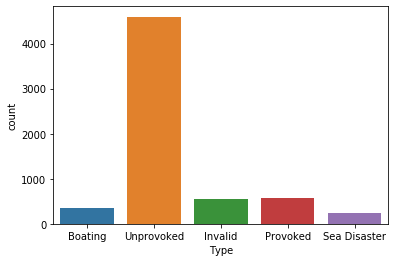

In [8]:
sns.countplot(x=(sharks["Type"]))
plt.show()

(array([1.260e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 1.100e+01, 2.000e+01,
        1.030e+02, 4.660e+02, 1.065e+03, 2.419e+03, 2.076e+03, 0.000e+00]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
        1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100]),
 <a list of 42 Patch objects>)

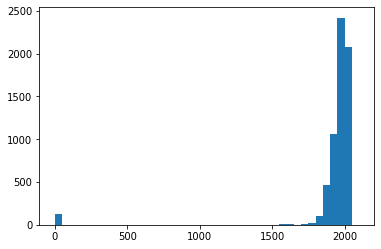

In [9]:
bins_y=np.arange(0, 2051 + 50, 50)
plt.hist(sharks["Year"],bins=bins_y)
plt.show()

(array([1.000e+00, 4.000e+00, 5.000e+00, 3.000e+00, 8.000e+00, 2.100e+01,
        1.040e+02, 4.770e+02, 1.095e+03, 2.473e+03, 1.979e+03]),
 array([1501, 1551, 1601, 1651, 1701, 1751, 1801, 1851, 1901, 1951, 2001,
        2051]),
 <a list of 11 Patch objects>)

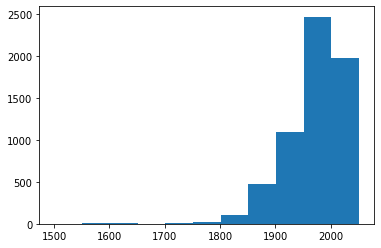

In [10]:
bins_y=np.arange(1501, 2051 + 50, 50)
plt.hist(sharks["Year"],bins=bins_y)
plt.show()

(array([  9.,  15.,  10.,  14.,  18.,  21.,  23.,  13.,  18.,  14.,  16.,
         14.,  18.,  18.,  12.,  25.,  11.,   5.,  14.,  15.,  12.,  22.,
         21.,  19.,  14.,  21.,  19.,  26.,  38.,  26.,  29.,  27.,  22.,
         27.,  32.,  32.,  30.,  24.,  25.,  24.,  27.,  41.,  28.,  31.,
         16.,  26.,  30.,  29.,  31.,  43.,  32.,  29.,  36.,  42.,  43.,
         51.,  41.,  54.,  93.,  93.,  78.,  86.,  61.,  66.,  51.,  58.,
         48.,  47.,  30.,  42.,  28.,  35.,  27.,  38.,  49.,  39.,  26.,
         25.,  25.,  35.,  49.,  40.,  50.,  41.,  37.,  39.,  35.,  55.,
         53.,  38.,  38.,  56.,  56.,  56.,  76.,  61.,  57.,  65.,  66.,
         97.,  92.,  88.,  92.,  92., 103., 103., 112., 122., 120., 101.,
        128., 117., 122., 127., 143., 130., 187.]),
 array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
        1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
        1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931

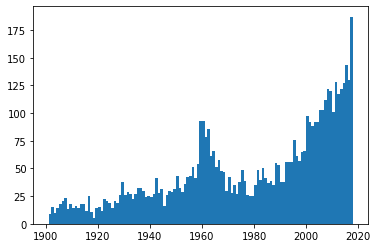

In [11]:
bins_y=np.arange(1901, 2019)
plt.hist(sharks["Year"],bins=bins_y)
plt.show()

Spike of sharks attack in year 1960

https://science.sciencemag.org/content/134/3472/87



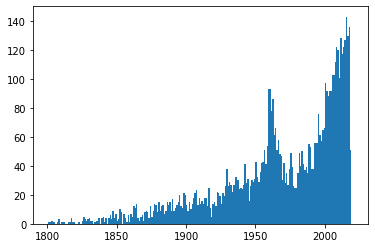

In [50]:
bins_y=np.arange(1801, 2021,1)
plt.hist(sharks["Year"],bins=bins_y)
plt.show()

In [13]:
sharks[sharks["Year"] <1700].shape

(138, 22)

In [14]:
sharks[sharks["Year"] >=1901].shape

(5547, 22)

In [15]:
sharks20 =sharks[(sharks["Year"] >=1901) & (sharks["Year"] < 2001)]
sharks21 =sharks[sharks["Year"] >=2001]
sharks =sharks[sharks["Year"] >=1801]

In [16]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 2018.06.25 to 1801.12.18.R
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6128 non-null   object 
 1   Year                    6128 non-null   float64
 2   Type                    6124 non-null   object 
 3   Country                 6088 non-null   object 
 4   Area                    5719 non-null   object 
 5   Location                5640 non-null   object 
 6   Activity                5615 non-null   object 
 7   Name                    5927 non-null   object 
 8   Sex                     5577 non-null   object 
 9   Age                     3454 non-null   object 
 10  Injury                  6108 non-null   object 
 11  Fatal (Y/N)             5595 non-null   object 
 12  Time                    2936 non-null   object 
 13  Species                 3417 non-null   object 
 14  Investigator or Source  6112

In [17]:
sharks20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3568 entries, 2000.12.24 to 1901.00.00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3568 non-null   object 
 1   Year                    3568 non-null   float64
 2   Type                    3567 non-null   object 
 3   Country                 3546 non-null   object 
 4   Area                    3339 non-null   object 
 5   Location                3278 non-null   object 
 6   Activity                3220 non-null   object 
 7   Name                    3430 non-null   object 
 8   Sex                     3161 non-null   object 
 9   Age                     1895 non-null   object 
 10  Injury                  3551 non-null   object 
 11  Fatal (Y/N)             3261 non-null   object 
 12  Time                    1424 non-null   object 
 13  Species                 1972 non-null   object 
 14  Investigator or Source  3559 n

In [18]:
yy=sharks20["Year"].unique()

In [19]:
sharks20_1 =sharks[(sharks["Year"] >=1901) & (sharks["Year"] < 1951)]
sharks20_2 =sharks[(sharks["Year"] >=1951) & (sharks["Year"] < 2001)]

In [20]:
sharks20_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 1950.12.31 to 1901.00.00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1095 non-null   object 
 1   Year                    1095 non-null   float64
 2   Type                    1094 non-null   object 
 3   Country                 1085 non-null   object 
 4   Area                    997 non-null    object 
 5   Location                988 non-null    object 
 6   Activity                979 non-null    object 
 7   Name                    1038 non-null   object 
 8   Sex                     989 non-null    object 
 9   Age                     366 non-null    object 
 10  Injury                  1091 non-null   object 
 11  Fatal (Y/N)             995 non-null    object 
 12  Time                    266 non-null    object 
 13  Species                 408 non-null    object 
 14  Investigator or Source  1094 n

In [21]:
sharks20_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 2000.12.24 to 1951.00.00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2473 non-null   object 
 1   Year                    2473 non-null   float64
 2   Type                    2473 non-null   object 
 3   Country                 2461 non-null   object 
 4   Area                    2342 non-null   object 
 5   Location                2290 non-null   object 
 6   Activity                2241 non-null   object 
 7   Name                    2392 non-null   object 
 8   Sex                     2172 non-null   object 
 9   Age                     1529 non-null   object 
 10  Injury                  2460 non-null   object 
 11  Fatal (Y/N)             2266 non-null   object 
 12  Time                    1158 non-null   object 
 13  Species                 1564 non-null   object 
 14  Investigator or Source  2465 n

In [22]:
aa=sharks20_2["Injury"].value_counts()
aa

FATAL                                 208
Survived                               67
No injury                              42
Foot bitten                            31
Leg bitten                             31
                                     ... 
Right lower leg & ankle lacerated       1
Leg & abdomen lacerated                 1
Puncture marks to right calf            1
No injury, tank scratched by shark      1
Minor bite on foot & swimfin            1
Name: Injury, Length: 1633, dtype: int64

In [23]:
act20 = sharks20["Type"].unique()
act20

array(['Unprovoked', 'Boating', 'Invalid', 'Provoked', 'Sea Disaster',
       nan], dtype=object)

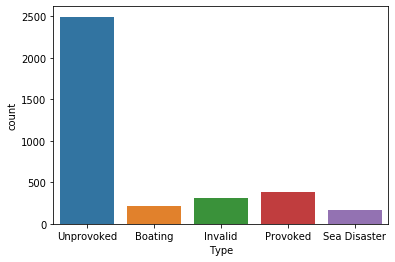

In [24]:
sns.countplot(x="Type", data=sharks20)
plt.show()

In [25]:
sharks20["Sex"].value_counts()

M    2888
F     271
.       1
N       1
Name: Sex, dtype: int64

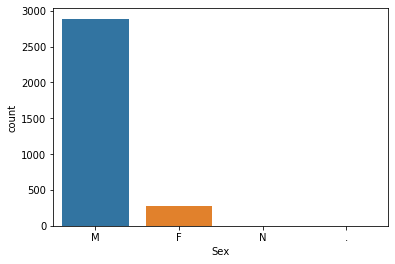

In [26]:
sns.countplot(x="Sex", data=sharks20)
plt.show()

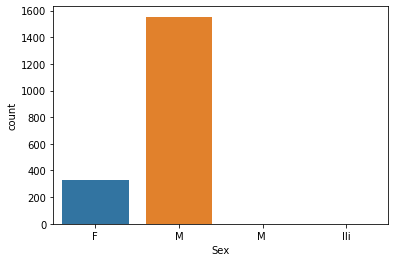

In [27]:
sns.countplot(x="Sex", data=sharks21)
plt.show()

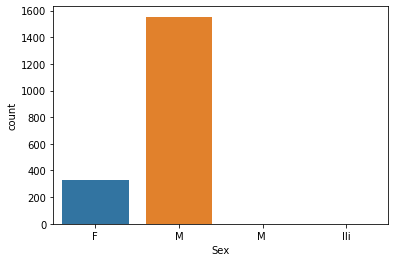

In [28]:
sns.countplot(x=sharks21["Sex"])
plt.show()

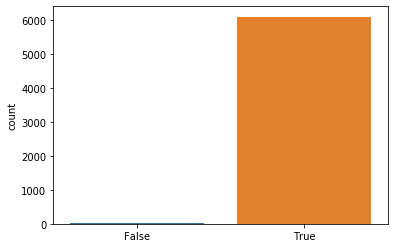

In [29]:
sns.countplot(x=(sharks["Case Number.1"] == sharks["Case Number.2"]))
plt.show()

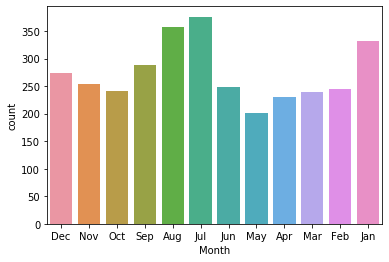

In [30]:
sns.countplot(x="Month", data=sharks20)
plt.show()

## Word counts stuff

In [31]:
def word_count(df):
    counts = dict()
    common = ["the","in","a","&","for","to","of","on","shark","it","were","out",
              "at","by","water","from","into","/","his","her","he","she","men",
             "after","with","was","when","off","sea","and","or","but","down","sharks",
             "him","her","shark's","that","an","went","days","day","3","2","1"]
    
    for string in df: 
        try:
            words = string.replace(",","").replace(".","").split()
        except AttributeError:
            pass

        for word in words:
            if word.lower() in common:
                pass
            elif word.lower() in counts:
                counts[word.lower()] += 1
            else:
                counts[word.lower()] = 1

    return counts

In [32]:
dic = word_count(sharks["Activity"])

activity_words = pd.Series( dic )

In [33]:
activity_words=activity_words.sort_values(ascending=False)
activity_words[:20]

swimming        1204
surfing         1165
fishing          791
diving           562
spearfishing     450
bathing          213
wading           184
standing         160
scuba            156
boat             152
body             144
boarding         138
overboard        113
fell             112
snorkeling       103
free             101
capsized          75
fish              63
surf              58
floating          58
dtype: int64

In [34]:
20678/activity_words.sum()

1.7538592027141646

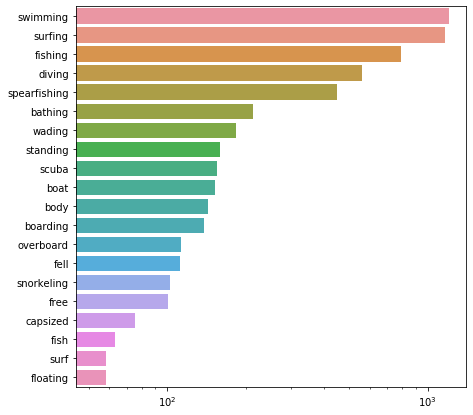

In [35]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.barplot(x=activity_words[:20] ,y=activity_words[:20].index)
plt.show()

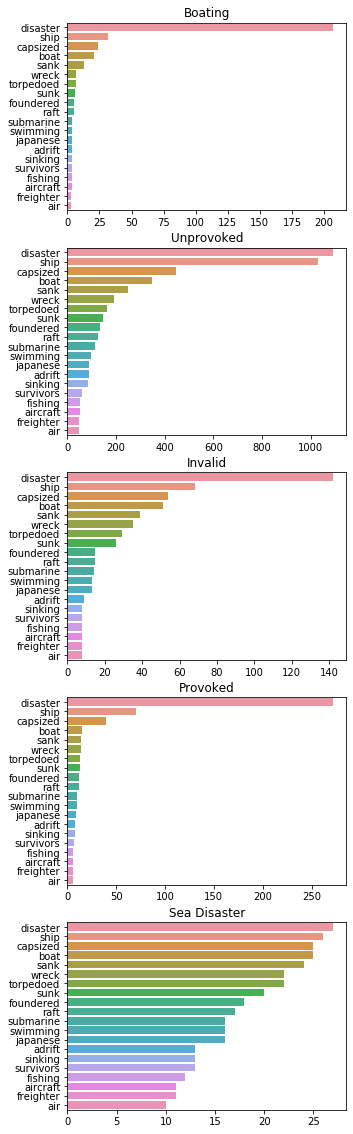

In [37]:
types = sharks["Type"].unique()[0:-1]
f, ax= plt.subplots( len(types),1, figsize=(5, 20), sharey=True)

for i in range(len(types)):
    dic = word_count(sharks[sharks["Type"] == types[i]]["Activity"])
    injury_words = pd.Series( dic ).sort_values(ascending=False)
    ax[i].set_title(types[i])
    sns.barplot(ax=ax[i],x=injury_words[:20] ,y=injury_words[:20].index)

In [38]:
dic = word_count(sharks[sharks["Type"] == "Provoked"]["Activity"])
activity_words = pd.Series( dic )
activity_words=activity_words.sort_values(ascending=False)
activity_words[:30]

fishing         272
spearfishing     70
diving           40
net              15
surfing          14
scuba            14
attempting       13
boat             13
swimming         12
feeding          12
standing         10
wading           10
tail              9
hooked            8
removing          8
fish              7
netting           6
surf              6
netted            6
shot              6
snorkeling        5
free              5
aquarium          5
fell              5
filming           5
seine             5
freediving        5
tank              5
dead              5
mullet            4
dtype: int64

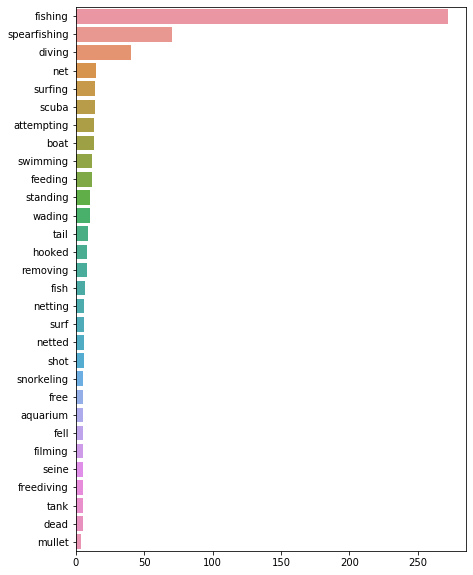

In [39]:
f, ax = plt.subplots(figsize=(7, 10))
sns.barplot(x=activity_words[:30] ,y=activity_words[:30].index)

In [40]:
dic = word_count(sharks[sharks["Type"] == "Sea Disaster"]["Activity"])
activity_words = pd.Series( dic )
activity_words=activity_words.sort_values(ascending=False)
activity_words[:30]

disaster     27
ship         26
capsized     25
boat         25
sank         24
wreck        22
torpedoed    22
sunk         20
foundered    18
raft         17
submarine    16
swimming     16
japanese     16
adrift       13
sinking      13
survivors    13
fishing      12
aircraft     11
freighter    11
air          10
uss          10
board         9
schooner      9
squall        9
german        8
steamer       8
typhoon       8
american      7
british       7
plane         7
dtype: int64

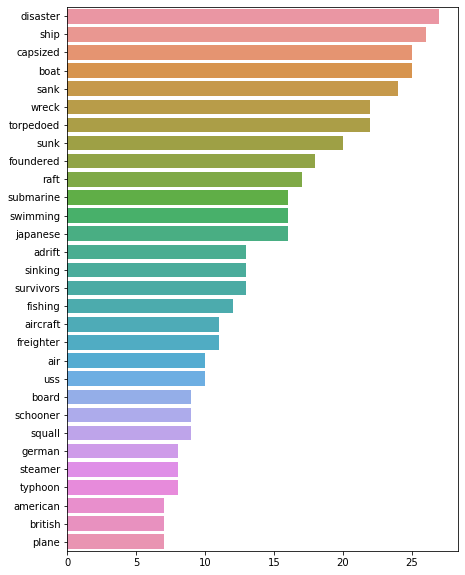

In [41]:
f, ax = plt.subplots(figsize=(7, 10))
sns.barplot(x=activity_words[:30] ,y=activity_words[:30].index)

In [42]:
dic = word_count(sharks[sharks["Type"] == "Boating"]["Activity"])
activity_words = pd.Series( dic )
activity_words=activity_words.sort_values(ascending=False)
activity_words[:20]

fishing       207
kayaking       32
rowing         24
boat           21
kayak          13
boating         7
canoeing        7
dinghy          6
watching        5
sailing         5
race            4
fish            4
rock            4
competing       4
attempting      4
paddling        4
snapper         4
wave            4
lobster         3
adrift          3
dtype: int64

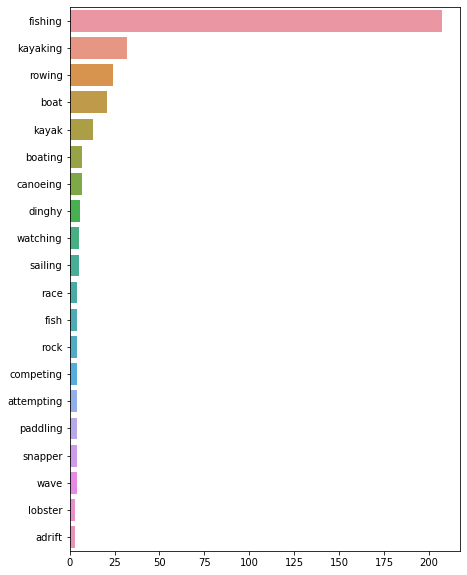

In [43]:
f, ax = plt.subplots(figsize=(7, 10))
sns.barplot(x=activity_words[:20] ,y=activity_words[:20].index)

In [44]:
dic = word_count(sharks[sharks["Type"] == "Invalid"]["Activity"])
activity_words = pd.Series( dic )
activity_words=activity_words.sort_values(ascending=False)
activity_words[:20]

swimming        142
diving           68
surfing          54
fishing          51
spearfishing     39
boat             35
scuba            29
capsized         26
bathing          15
overboard        15
fell             14
wading           13
sank             13
disappeared       9
disaster          8
free              8
line              8
boarding          8
boogie            8
people            8
dtype: int64

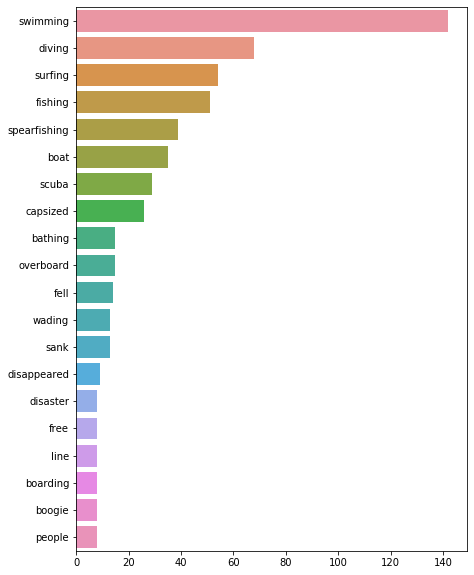

In [45]:
f, ax = plt.subplots(figsize=(7, 10))
sns.barplot(x=activity_words[:20] ,y=activity_words[:20].index)

In [46]:
def word_count_injuries(df):
    counts = dict()
    common = ["the","in","a","&","for","to","of","on","shark","it","were","out","boat",
              "at","by","water","from","into","/","his","her","he","she","men","board","m",
             "after","with","was","when","off","sea","and","or","but","down","sharks","have"
             "him","her","shark's","that","an","went","days","day","3","2","1","no","not"]
    
    for string in df: 
        try:
            words = string.replace(",","").replace('"',"").replace(".","").split()
        except AttributeError:
            pass

        for word in words:
            if word.lower() in common:
                pass
            elif word.lower() in counts:
                counts[word.lower()] += 1
            else:
                counts[word.lower()] = 1

    return counts

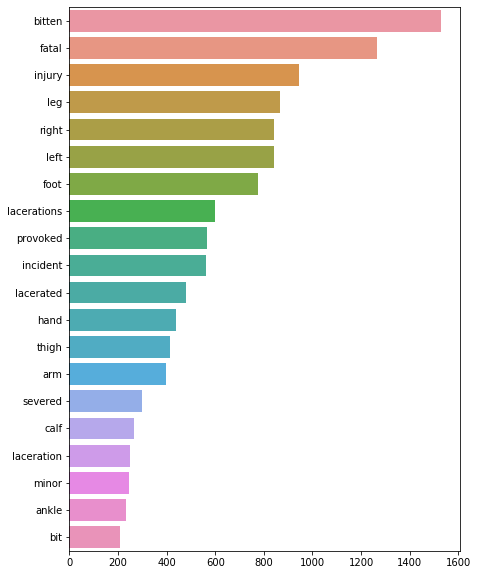

In [47]:
dic = word_count_injuries(sharks["Injury"])

injury_words = pd.Series( dic ).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(7, 10))
sns.barplot(x=injury_words[:20] ,y=injury_words[:20].index)
plt.show()

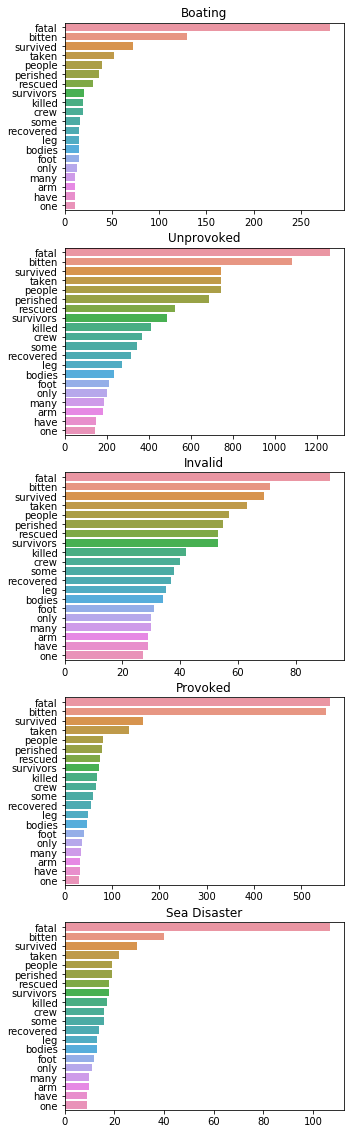

In [48]:
types = sharks["Type"].unique()[0:-1]
f, ax= plt.subplots( len(types),1, figsize=(5, 20), sharey=True)


for i in range(len(types)):
    dic = word_count_injuries(sharks[sharks["Type"] == types[i]]["Injury"])
    injury_words = pd.Series( dic ).sort_values(ascending=False)
    sns.barplot(ax=ax[i],x=injury_words[:20] ,y=injury_words[:20].index)
    ax[i].set_title(types[i])
    


In [49]:

for i in range(len(types)):
    dic = word_count_injuries(sharks[sharks["Type"] == types[i]]["Injury"])
    injury_words = pd.Series( dic ).sort_values(ascending=False)
    sns.barplot(ax=ax[i],x=injury_words[:20] ,y=injury_words[:20].index)
    ax[i].set_title(types[i])
    
